In [1]:
# Import Required Libraries
from pydoc import help  # can type in the python console 'help(name of function)'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML

In [2]:
data = pd.read_csv('synthetic_wine_quality_100k.csv',header=0)

In [3]:
data

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,magnesium,potassium,color_intensity,tannin,quality
0,8.494481,0.971169,0.339106,2.777283,0.178901,21.638599,6.499575,1.002421,3.364147,0.601275,12.166089,42.539961,89.160797,9.386826,369.014647,4
1,15.408572,0.890457,0.550412,1.884877,0.069986,36.155326,55.739460,1.002187,3.544456,1.023848,10.553020,94.150774,81.762263,2.712462,529.612789,7
2,12.783927,0.626555,0.119059,2.500118,0.019863,45.431961,235.151536,0.990532,3.769660,1.036323,8.037629,22.570486,191.730695,8.910178,395.090538,5
3,11.183902,0.839819,0.536204,7.365596,0.184751,69.460096,114.269154,1.003484,3.045882,0.950489,11.927614,111.991066,89.219971,8.033634,149.087446,2
4,5.872224,0.647645,0.243698,13.325743,0.092890,48.980944,35.847631,1.000278,2.814676,0.330670,14.275993,159.070671,85.670884,1.074774,560.809058,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,13.507658,1.033225,0.111373,11.377150,0.136449,47.429601,52.836045,0.997719,3.781395,1.809737,14.666195,16.230614,140.487711,3.011046,557.088928,8
99996,13.351035,1.043831,0.750758,4.451653,0.197994,34.066663,116.505717,0.991552,3.132907,1.043442,11.847920,184.141792,153.416581,4.924727,340.096738,4
99997,12.093441,0.388306,0.751994,8.846036,0.102671,50.138224,241.061317,1.003525,3.308818,1.010722,14.604949,17.597305,69.947007,13.497361,325.109827,4
99998,9.993367,1.079624,0.057180,13.453427,0.136347,66.944593,29.158015,1.000924,3.717804,1.028741,13.486848,103.554956,183.743684,4.188276,365.270778,4


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   fixed_acidity         100000 non-null  float64
 1   volatile_acidity      100000 non-null  float64
 2   citric_acid           100000 non-null  float64
 3   residual_sugar        100000 non-null  float64
 4   chlorides             100000 non-null  float64
 5   free_sulfur_dioxide   100000 non-null  float64
 6   total_sulfur_dioxide  100000 non-null  float64
 7   density               100000 non-null  float64
 8   pH                    100000 non-null  float64
 9   sulphates             100000 non-null  float64
 10  alcohol               100000 non-null  float64
 11  magnesium             100000 non-null  float64
 12  potassium             100000 non-null  float64
 13  color_intensity       100000 non-null  float64
 14  tannin                100000 non-null  float64
 15  q

In [19]:
X = data.loc[:, 'fixed_acidity':'tannin']
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,magnesium,potassium,color_intensity,tannin
0,8.494481,0.971169,0.339106,2.777283,0.178901,21.638599,6.499575,1.002421,3.364147,0.601275,12.166089,42.539961,89.160797,9.386826,369.014647
1,15.408572,0.890457,0.550412,1.884877,0.069986,36.155326,55.739460,1.002187,3.544456,1.023848,10.553020,94.150774,81.762263,2.712462,529.612789
2,12.783927,0.626555,0.119059,2.500118,0.019863,45.431961,235.151536,0.990532,3.769660,1.036323,8.037629,22.570486,191.730695,8.910178,395.090538
3,11.183902,0.839819,0.536204,7.365596,0.184751,69.460096,114.269154,1.003484,3.045882,0.950489,11.927614,111.991066,89.219971,8.033634,149.087446
4,5.872224,0.647645,0.243698,13.325743,0.092890,48.980944,35.847631,1.000278,2.814676,0.330670,14.275993,159.070671,85.670884,1.074774,560.809058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,13.507658,1.033225,0.111373,11.377150,0.136449,47.429601,52.836045,0.997719,3.781395,1.809737,14.666195,16.230614,140.487711,3.011046,557.088928
99996,13.351035,1.043831,0.750758,4.451653,0.197994,34.066663,116.505717,0.991552,3.132907,1.043442,11.847920,184.141792,153.416581,4.924727,340.096738
99997,12.093441,0.388306,0.751994,8.846036,0.102671,50.138224,241.061317,1.003525,3.308818,1.010722,14.604949,17.597305,69.947007,13.497361,325.109827
99998,9.993367,1.079624,0.057180,13.453427,0.136347,66.944593,29.158015,1.000924,3.717804,1.028741,13.486848,103.554956,183.743684,4.188276,365.270778


In [20]:
Y = data['quality']  
Y

0        4
1        7
2        5
3        2
4        7
        ..
99995    8
99996    4
99997    4
99998    4
99999    7
Name: quality, Length: 100000, dtype: int64

In [21]:
# Chuẩn hóa dữ liệu (đưa về cùng thang đo, rất quan trọng).
# Đưa các biến về cùng thang đo (mean = 0, std = 1)
standardisedX = scale(X)

    # Chuyển lại thành DataFrame với cùng index và cột như ban đầu
standardisedX = pd.DataFrame(standardisedX, index=X.index, columns=X.columns)


In [22]:
standardisedX

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,magnesium,potassium,color_intensity,tannin
0,-0.433336,0.275205,-0.754952,-1.184655,1.345796,-0.694932,-1.727416,1.343227,-0.110921,-1.118562,0.331691,-1.139321,-1.186722,0.346452,0.282566
1,1.564910,0.088820,-0.145244,-1.397893,-0.642773,0.034599,-1.028021,1.285175,0.407989,-0.256508,-0.465768,-0.195402,-1.289092,-1.311743,1.293873
2,0.806359,-0.520603,-1.389881,-1.250883,-1.557909,0.500793,1.520316,-1.602256,1.056101,-0.231060,-1.709310,-1.504546,0.232490,0.228032,0.446769
3,0.343935,-0.028118,-0.186239,-0.088289,1.452610,1.708316,-0.196676,1.606541,-1.026850,-0.406161,0.213795,0.130882,-1.185904,0.010261,-1.102343
4,-1.191197,-0.471902,-1.030245,1.335874,-0.224594,0.679145,-1.310561,0.812409,-1.692236,-1.670599,1.374772,0.991929,-1.235011,-1.718614,1.490319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.015525,0.418510,-1.412058,0.870262,0.570707,0.601183,-1.069261,0.178370,1.089872,1.346713,1.567677,-1.620497,-0.476536,-1.237562,1.466893
99996,0.970260,0.443002,0.432838,-0.784568,1.694391,-0.070365,-0.164908,-1.349465,-0.776403,-0.216537,0.174397,1.450459,-0.297645,-0.762122,0.100466
99997,0.606802,-1.070789,0.436406,0.265459,-0.046009,0.737304,1.604258,1.616716,-0.270150,-0.283285,1.537399,-1.595501,-1.452575,1.367682,0.006092
99998,-0.000142,0.525659,-1.568427,1.366383,0.568857,1.581900,-1.405579,0.972440,0.906866,-0.246527,0.984640,-0.023407,0.121977,-0.945088,0.258990


In [23]:
standardisedX.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,magnesium,potassium,color_intensity,tannin
count,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05
mean,3.142020e-16,-2.260947e-16,7.830181e-17,-7.432277e-17,-2.214051e-16,2.916067e-16,-3.410605e-17,2.803517e-15,-2.639311e-16,4.149570e-17,-3.396394e-17,-2.754064e-16,2.279421e-16,6.238565e-17,1.298872e-16
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-1.732270e+00,-1.736551e+00,-1.733408e+00,-1.728798e+00,-1.737909e+00,-1.732114e+00,-1.734433e+00,-1.733823e+00,-1.734468e+00,-1.733157e+00,-1.727911e+00,-1.734381e+00,-1.728554e+00,-1.737179e+00,-1.726273e+00
25%,-8.668315e-01,-8.681019e-01,-8.667501e-01,-8.661401e-01,-8.672188e-01,-8.623267e-01,-8.626367e-01,-8.636375e-01,-8.700394e-01,-8.677043e-01,-8.647360e-01,-8.676730e-01,-8.669206e-01,-8.589995e-01,-8.683581e-01
50%,3.958979e-03,1.909280e-03,1.770246e-03,-3.504898e-03,7.447054e-03,-4.931391e-03,-4.628874e-03,-2.928721e-03,8.688570e-03,-8.182872e-04,-4.935217e-03,-6.804852e-04,-4.315630e-03,-2.245827e-03,3.725006e-03
75%,8.671203e-01,8.627973e-01,8.649969e-01,8.676898e-01,8.625434e-01,8.656355e-01,8.672066e-01,8.650232e-01,8.677181e-01,8.635223e-01,8.664801e-01,8.654248e-01,8.644903e-01,8.651220e-01,8.645084e-01
max,1.735811e+00,1.727316e+00,1.729021e+00,1.735914e+00,1.731012e+00,1.735412e+00,1.731204e+00,1.734348e+00,1.718968e+00,1.734820e+00,1.732694e+00,1.740465e+00,1.730514e+00,1.740840e+00,1.737093e+00


Vì std ≈ 1.00:
-> toàn bộ các biến đã được chuẩn hóa về cùng một hệ quy chiếu
-> đều được đưa về thang đo chuẩn.

In [24]:
standardisedX.apply(np.std) #độ lệch chuẩn sau chuẩn hoá(bằng nhau hết)

fixed_acidity           1.0
volatile_acidity        1.0
citric_acid             1.0
residual_sugar          1.0
chlorides               1.0
free_sulfur_dioxide     1.0
total_sulfur_dioxide    1.0
density                 1.0
pH                      1.0
sulphates               1.0
alcohol                 1.0
magnesium               1.0
potassium               1.0
color_intensity         1.0
tannin                  1.0
dtype: float64

Kết quả toàn 1.0 là đúng và bắt buộc phải có trước khi làm PCA.

Điều này chứng tỏ dữ liệu đã được chuẩn hóa chuẩn chỉnh.

In [25]:
standardisedX.apply(np.mean)

fixed_acidity           3.142020e-16
volatile_acidity       -2.260947e-16
citric_acid             7.830181e-17
residual_sugar         -7.432277e-17
chlorides              -2.214051e-16
free_sulfur_dioxide     2.916067e-16
total_sulfur_dioxide   -3.410605e-17
density                 2.803517e-15
pH                     -2.639311e-16
sulphates               4.149570e-17
alcohol                -3.396394e-17
magnesium              -2.754064e-16
potassium               2.279421e-16
color_intensity         6.238565e-17
tannin                  1.298872e-16
dtype: float64

In [26]:
# Tính PCA (fit) -bước “huấn luyện” (fit) mô hình PCA
# Tính toán ma trận hiệp phương sai, giá trị riêng, vector riêng để tìm các thành phần chính
pca = PCA().fit(standardisedX)

In [27]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd


# Bước 4 – Tóm tắt, phân tích kết quả PCA
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"),
                                         ("varprop", "Proportion of Variance"),
                                         ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(zip(a, b, c), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary)
    return summary

summary = pca_summary(pca, standardisedX)

Importance of components:


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,1.012848,0.068391,0.068391
PC2,1.006650,0.067556,0.135947
PC3,1.006015,0.067471,0.203418
PC4,1.004306,0.067242,0.270660
PC5,1.003185,0.067092,0.337752
PC6,1.002811,0.067042,0.404794
PC7,1.001271,0.066836,0.471631
PC8,1.000100,0.066680,0.538311
PC9,0.998690,0.066492,0.604803


PCA đã tách 15 biến gốc thành 15 thành phần chính mới.
Mỗi thành phần giữ khoảng 6–7% thông tin.
Đến PC12, ta giữ được ~80% tổng thông tin,
nên có thể giảm số đặc trưng từ 15 → 12 mà dữ liệu vẫn đủ “chất lượng”.

In [28]:
summary.sdev

,Standard deviation
PC1,1.012848
PC2,1.006650
PC3,1.006015
PC4,1.004306
PC5,1.003185
PC6,1.002811
PC7,1.001271
PC8,1.000100
PC9,0.998690
PC10,0.997828


Sau khi chuẩn hóa, các biến có phương sai = 1.
PCA tạo ra 15 thành phần chính (PC1–PC15), trong đó PC1 có độ lệch chuẩn cao nhất → dữ liệu biến động mạnh nhất, giữ nhiều thông tin nhất.
Các PC sau có độ lệch chuẩn giảm dần, cho thấy mức độ biến thiên giảm.
Những thành phần có sdev < 1 ít đóng góp vào sự đa dạng của dữ liệu nên có thể loại bỏ khi giảm chiều.

In [29]:
np.sum(summary.sdev**2)

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Standard deviation    15.0
dtype: float64

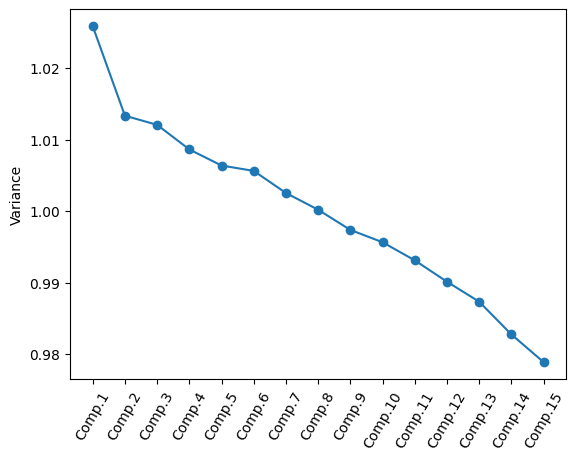

In [30]:
#để biết bao nhiêu propotion là tốt nhất thì phải vẽ biểu đồ ra
import numpy as np
import matplotlib.pyplot as plt

def screeplot(pca, standardised_values):
    # Tính phương sai (variance) của từng thành phần chính
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1

    # Vẽ đồ thị Scree Plot
    plt.plot(x, y, 'o-')
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()

screeplot(pca, standardisedX)

Biểu đồ cho thấy PC1 và PC2 là hai thành phần giữ nhiều phương sai nhất.
Từ PC3 trở đi, phương sai giảm dần và ổn định quanh 1 → những thành phần này ít đóng góp thêm thông tin.
Vì vậy, có thể chỉ cần giữ lại vài thành phần đầu (ví dụ PC1–PC3) để giảm chiều dữ liệu mà vẫn bảo toàn phần lớn thông tin ban đầ

In [31]:
print("Các thành phần chính (vector riêng):")
pca.components_[0]

Các thành phần chính (vector riêng):


array([-3.93186491e-01,  1.73565861e-01,  4.06159426e-01,  1.41903261e-01,
        4.52121236e-01, -3.10594234e-01, -3.05674167e-04,  7.47636283e-02,
        1.85666897e-01,  4.26641947e-01,  2.10306537e-01,  6.61195312e-02,
        1.62966716e-01,  1.52489004e-01, -9.37973966e-02])

PC1 được tạo bởi sự kết hợp mạnh nhất của z6, z11, z4 (dương) và z2, z7 (âm).
Nghĩa là nếu giá trị các biến dương tăng thì PC1 sẽ tăng, còn các biến âm tăng thì PC1 sẽ giảm.
Từ đó PC1 đại diện cho sự đối lập giữa hai nhóm đặc trưng này — nhóm kéo lên và nhóm kéo xuống.

In [32]:
np.sum(pca.components_[0]**2)

np.float64(1.0000000000000009)

In [33]:
def calcpcc(variables, loadings):
    # find the number of samples in the data set and the number of variables
    numsamples, numvariables = variables.shape

    # make a vector to store the component
    pc = np.zeros(numsamples)

    # calculate the value of the component for each sample
    for i in range(numsamples):
        valuei = 0
        for j in range(numvariables):
            valueij = variables.iloc[i, j]
            loadingj = loadings[j]
            valuei = valuei + (valueij * loadingj)
        pc[i] = valuei

    return pc

calcpcc(standardisedX, pca.components_[0])

array([-1.79658911e-03, -1.73823034e+00, -2.46028985e+00, ...,
       -3.20866194e-01, -3.92654150e-01,  1.03017685e+00], shape=(100000,))

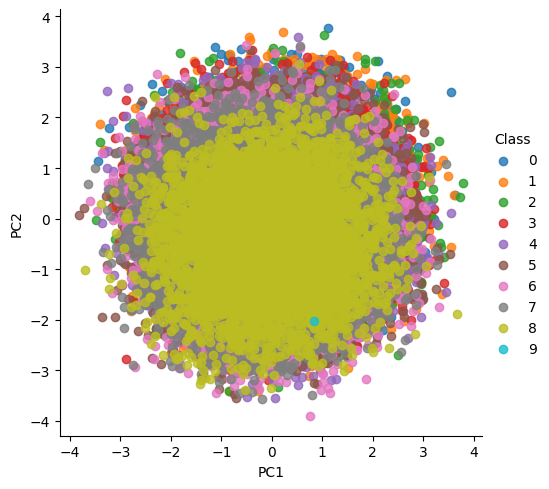

In [34]:
def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(
        data = {
            'PC1': foo[:, 0],
            'PC2': foo[:, 1],
            'Class': classifs
        }
    )
    sns.lmplot(x="PC1", y="PC2", data=bar, hue="Class", fit_reg=False)

pca_scatter(pca, standardisedX, Y)

Các điểm tạo thành một khối tròn dày đặc ở trung tâm → cho thấy:
- PC1 và PC2 không phân tách rõ 9 nhóm class.
- Điều này nghĩa là hai thành phần chính đầu tiên chỉ thể hiện sự phân tán tổng thể của dữ liệu, chứ chưa đủ để nhận diện hay phân nhóm.

Một số class (màu khác nhau) chồng chéo mạnh → các nhóm có thể không khác biệt đáng kể về phương sai.

Class màu vàng (ở giữa) chiếm vùng trung tâm → có thể do nó có nhiều điểm nhất (xuất hiện nhiều nhất trong dữ liệu).